In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Sample data structured by trace files and cache types
data = {
    "Cache Size": [32, 64, 128, 256, 512, 1024, 2048, 4096],
    "trace1": {
        "LRU": [664, 664, 664, 664, 664, 664, 664, 664],
        "LRUSEE": [360, 392, 456, 584, 664, 664, 664, 664],
        "FIFO": [340, 382, 452, 582, 664, 664, 664, 664],
        "FIFOSEE": [644, 654, 660, 662, 664, 664, 664, 664]
    },
    "trace2": {
        "LRU": [6723, 6725, 6725, 6725, 6725, 6725, 6725, 6725],
        "LRUSEE": [3908, 3940, 4004, 4132, 4378, 4900, 5924, 6725],
        "FIFO": [3732, 3852, 3960, 4110, 4378, 4896, 5922, 6725],
        "FIFOSEE": [6505, 6618, 6672, 6700, 6714, 6720, 6723, 6725]
    },
    "trace3": {
        "LRU": [221927, 318994, 360653, 413593, 435357, 440045, 441796, 492275],
        "LRUSEE": [237981, 325537, 369128, 417327, 434110, 437385, 439597, 506497],
        "FIFO": [200293, 287841, 339815, 386375, 412924, 426595, 438340, 496457],
        "FIFOSEE": [187533, 276920, 329227, 379612, 410085, 426168, 435903, 491930]
    },
    "trace4": {
        "LRU": [1678652, 2378369, 2702480, 3058076, 3213579, 3230410, 3233052, 3736240],
        "LRUSEE": [1695034, 2385011, 2711138, 3061913, 3212285, 3227762, 3230696, 3750435],
        "FIFO": [1397779, 2001691, 2428166, 2770887, 2991132, 3113020, 3188038, 3749857],
        "FIFOSEE": [1384315, 1990775, 2417516, 2763890, 2988258, 3112565, 3184779, 3745593]
    }
}

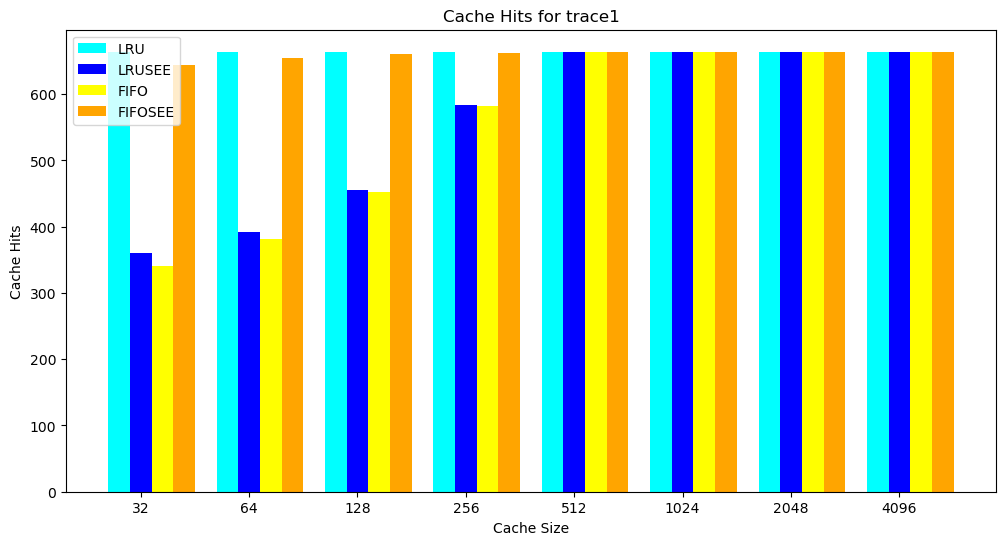

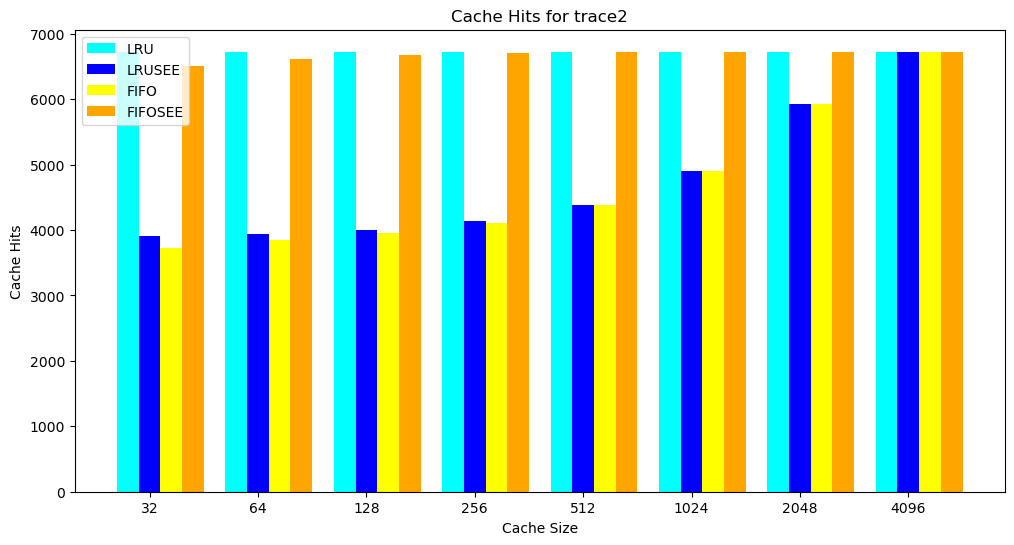

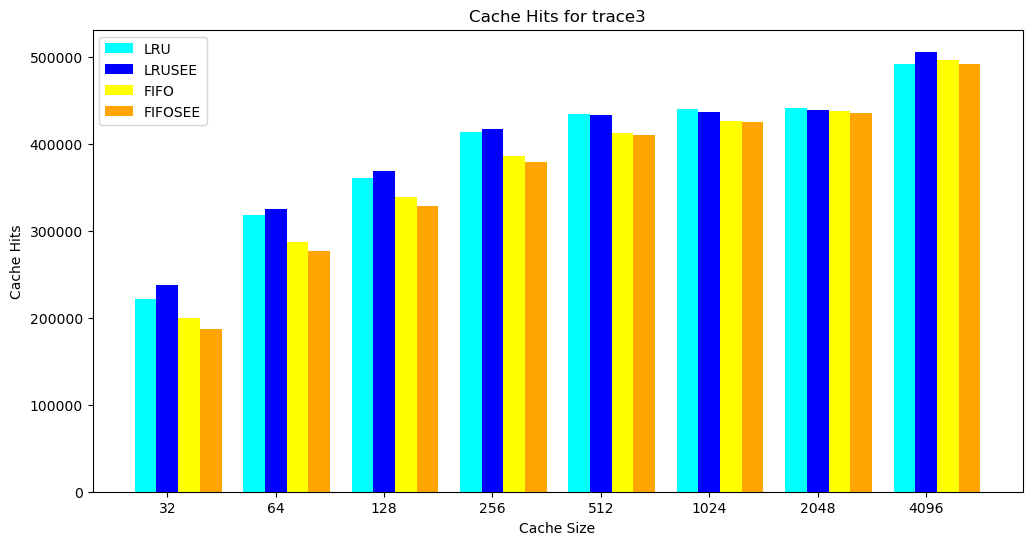

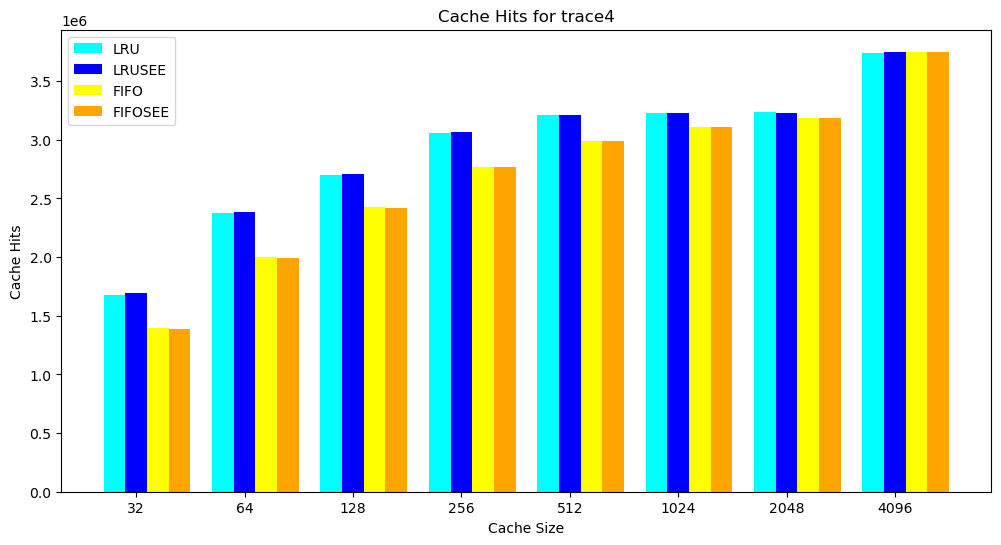

In [9]:
def plot_column_graphs(data):
    cache_sizes = data["Cache Size"]
    num_cache_sizes = len(cache_sizes)
    bar_width = 0.2
    colors = ['cyan', 'blue', 'yellow', 'orange']

    for trace_key in data.keys():
        if trace_key != "Cache Size":
            # Calculating positions for each bar
            positions = list(range(num_cache_sizes))
            cache_types = data[trace_key].keys()

            plt.figure(figsize=(12, 6))

            # Plotting each cache type with different colors
            for i, (cache_type, color) in enumerate(zip(cache_types, colors)):
                plt.bar([p + bar_width*i for p in positions], 
                        data[trace_key][cache_type], 
                        width=bar_width, 
                        color=color, 
                        label=cache_type)

            # Adding labels and title
            plt.xlabel('Cache Size')
            plt.ylabel('Cache Hits')
            plt.title(f'Cache Hits for {trace_key}')
            plt.xticks([p + bar_width for p in positions], cache_sizes)
            plt.legend()

            plt.show()

# Run the function to generate graphs
plot_column_graphs(data)

In [11]:
data_execution_times = {
    "Cache Size": [32, 64, 128, 256, 512, 1024, 2048, 4096],
    "trace1": {
        "LRU": [0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045],
        "LRUSEE": [0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055],
        "FIFO": [0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005],
        "FIFOSEE": [0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055, 0.006]
    },
    "trace2": {
        "LRU": [0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045],
        "LRUSEE": [0.012, 0.017, 0.022, 0.027, 0.032, 0.037, 0.042, 0.047],
        "FIFO": [0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05],
        "FIFOSEE": [0.017, 0.022, 0.027, 0.032, 0.037, 0.042, 0.047, 0.052]
    },
    "trace3": {
        "LRU": [0.9, 0.85, 0.88, 0.85, 0.84, 0.86, 0.83, 0.85],
        "LRUSEE": [0.95, 0.92, 0.91, 0.89, 0.87, 0.86, 0.84, 0.90],
        "FIFO": [0.95, 0.91, 0.92, 0.89, 0.89, 0.89, 0.88, 0.88],
        "FIFOSEE": [0.88, 0.87, 0.85, 0.83, 0.82, 0.80, 0.81, 0.83]
    },
    "trace4": {
        "LRU": [7.09, 6.87, 6.93, 6.75, 6.90, 6.88, 6.88, 6.97],
        "LRUSEE": [7.71, 7.46, 7.57, 7.51, 7.48, 7.52, 7.70, 7.64],
        "FIFO": [7.86, 7.71, 7.66, 7.42, 7.38, 7.64, 7.42, 7.31],
        "FIFOSEE": [6.98, 6.99, 6.90, 6.81, 6.83, 6.75, 6.74, 6.73]
    }
}

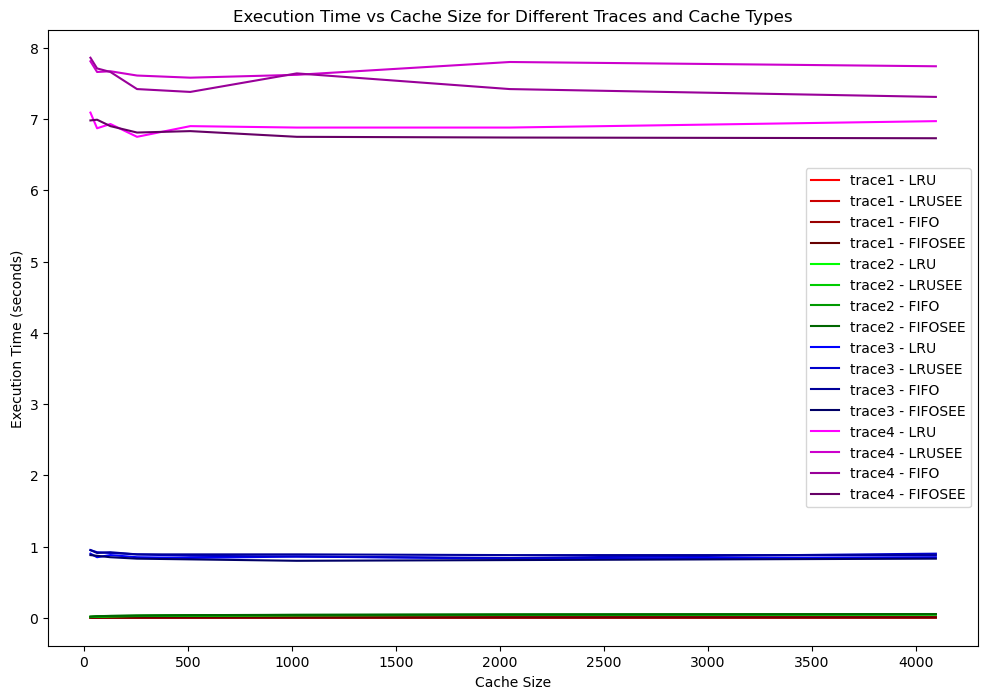

In [14]:
# Base colors for each trace file
base_colors = {
    "trace1": (1, 0, 0),  # Red
    "trace2": (0, 1, 0),  # Green
    "trace3": (0, 0, 1),  # Blue
    "trace4": (1, 0, 1),  # Purple
}
# Function to adjust the lightness of a color
def adjust_lightness(color, amount):
    import matplotlib.colors as mcolors
    try:
        c = mcolors.to_rgb(color)
        return mcolors.to_hex([x * amount for x in c])
    except ValueError:
        return color

# Plotting the graph
plt.figure(figsize=(10, 6))

# Replace 'data_execution_times' with your actual data dictionary
for trace in data_execution_times.keys():
    if trace != "Cache Size":
        base_color = base_colors[trace]
        for j, (cache_type, exec_times) in enumerate(data_execution_times[trace].items()):
            adjusted_color = adjust_lightness(base_color, 1 - 0.2 * j)  # More distinct shade differences
            plt.plot(data_execution_times["Cache Size"], exec_times, 
                     color=adjusted_color,
                     label=f"{trace} - {cache_type}")

plt.xlabel("Cache Size")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time vs Cache Size for Different Traces and Cache Types")
plt.legend()
plt.show()